In [1]:
# import required libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# open csv file
df = pd.read_csv('indian_liver_patient.csv')
df.columns = df.columns.map(str.lower)                              # column names to lowercase
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# check data types, it provides also details on null values, so next checking of null values may not be required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
direct_bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
alkaline_phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
alamine_aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
aspartate_aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
total_protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
albumin_and_globulin_ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


### Handle missing values
We are going to fix missing values on albumin_and_globulin_ratio field, easiest way is often best way, so just replace it with mean or median

In [5]:
# replacing missing values with mean
df.albumin_and_globulin_ratio.fillna(df.albumin_and_globulin_ratio.mean(), inplace=True)

In [6]:
# are there still any missing values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  583 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
# this is simply my selection (from highly correlated features, you could also use different from pairs)
df.drop(['direct_bilirubin', 'aspartate_aminotransferase', 'total_protiens', 'albumin'], axis=1, inplace=True);

### Outliers & transformation
Now check data using boxplot and distplot to see what features are skewed, what is ratio of outliers, if log1p helps etc

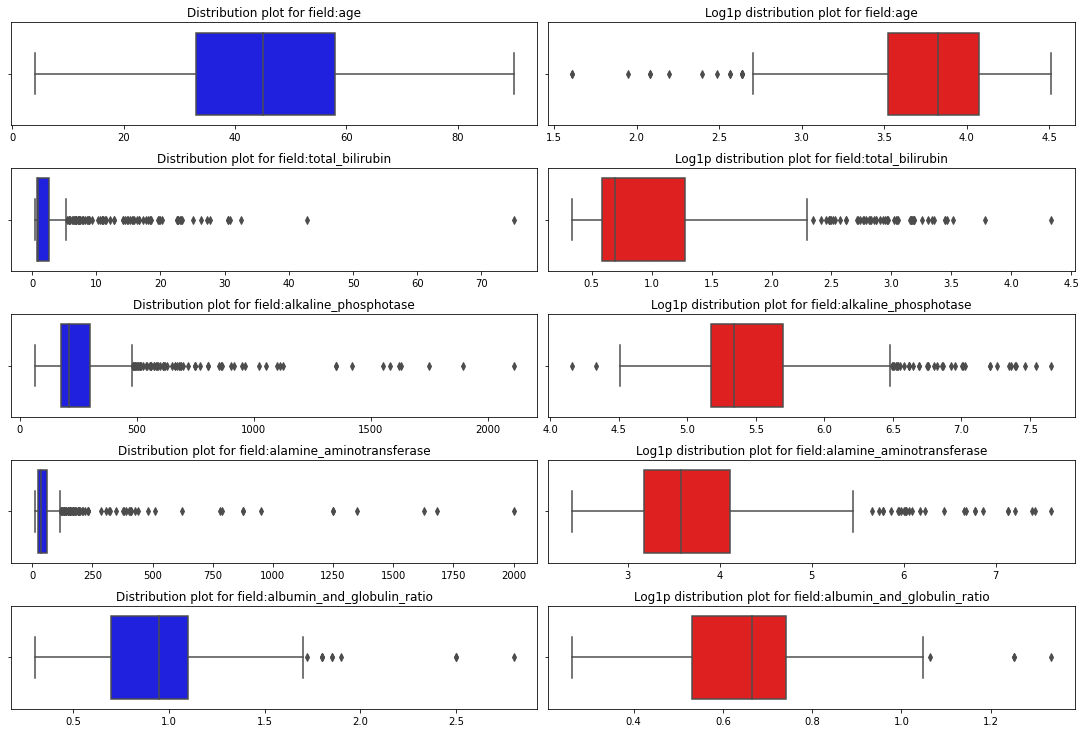

In [8]:
# outlier check
plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop('dataset', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

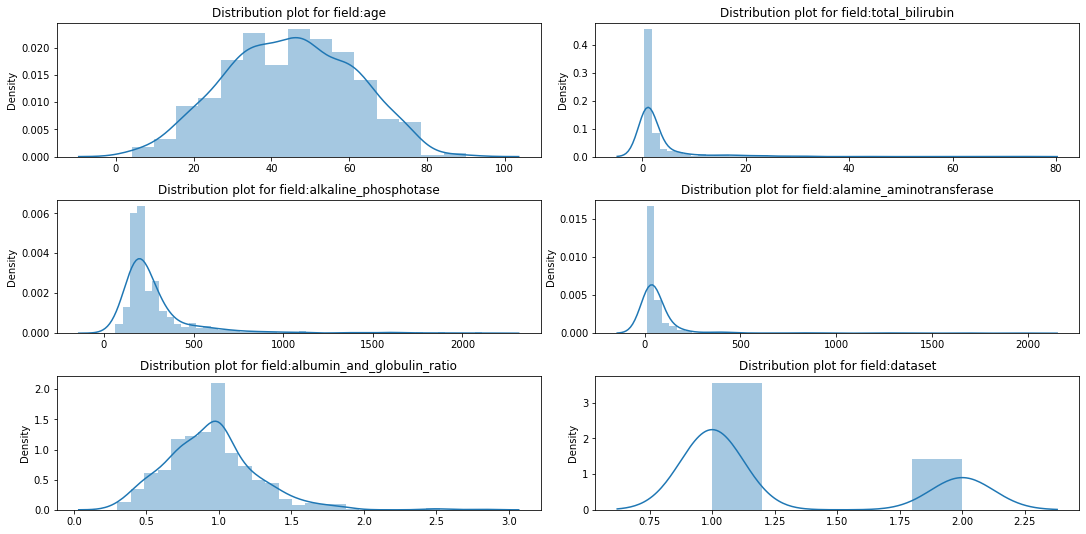

In [9]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [10]:
# save skewed features
skewed_cols = ['albumin_and_globulin_ratio','total_bilirubin', 'alkaline_phosphotase', 'alamine_aminotransferase']

In [11]:
# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

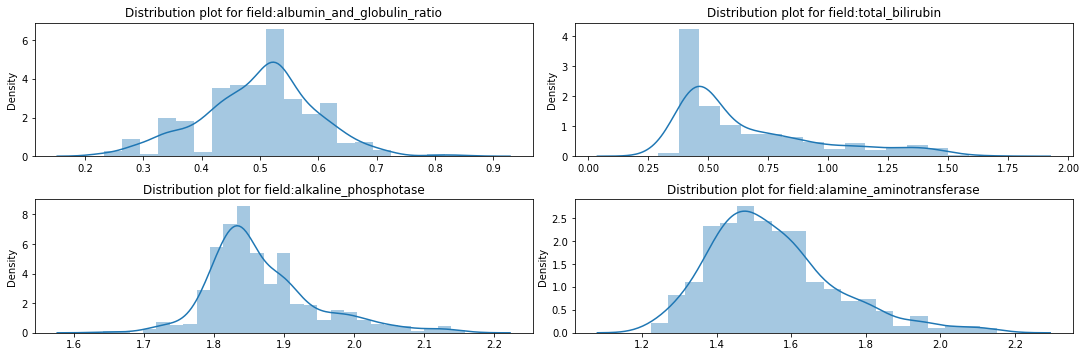

In [12]:
# Next check & fix strongly skewed features
# apply log1p transform
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Encode & Scale
I will use sklearn library to encode gender and scale numerical variables

In [13]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [14]:
# gender contains string values Male, Female; these will be converted into 0, 1, as ML algorithms like just numerical values
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.gender.head()

0    0
1    1
2    1
3    1
4    1
Name: gender, dtype: int32

In [15]:
rs = RobustScaler()
for c in df[['age', 'gender', 'total_bilirubin', 'alkaline_phosphotase', 'alamine_aminotransferase', 'albumin_and_globulin_ratio']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,albumin_and_globulin_ratio,dataset
0,0.80,-1.0,-0.234465,-0.200886,-0.797391,-0.115796,1
1,0.68,0.0,2.572890,2.293084,0.627949,-0.532099,1
2,0.68,0.0,2.053111,1.620312,0.560449,-0.140769,1
3,0.52,0.0,0.000000,-0.252023,-0.930409,0.126945,1
4,1.08,0.0,1.292782,-0.121830,-0.267086,-1.560985,1


## Balance data

In [16]:
from sklearn.utils import resample
df.dataset.value_counts()

1    416
2    167
Name: dataset, dtype: int64

In [17]:
# Split data on majority and minority.. minority is dataset == 2
minority = df[df.dataset==2]
majority = df[df.dataset==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 7)
Majority size: (416, 7)


In [18]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 7)


In [19]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)

In [20]:
df.shape

(832, 7)

In [21]:
df['dataset'] = df['dataset'].apply({1:0,2:1}.get)

In [22]:
df['dataset'].unique()

array([1, 0], dtype=int64)

## Split data for modeling
This is very needed in order to be able to compare performance of model on unseen data. I will choose test size to be 0.25. Dataset is also split to X (features) and y (target) variables.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('dataset', axis=1), df['dataset'], test_size=0.05, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (790, 6)
Test values shape: (42, 6)
Train target shape: (790,)
Test target shape: (42,)


## Model selection
We will use several popular models and see how they perform on our dataset.
At the end we choose 3 best performing models and will merge them together.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Logistic regression

LogisticRegression()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       401
           1       0.67      0.81      0.73       389

    accuracy                           0.71       790
   macro avg       0.72      0.71      0.71       790
weighted avg       0.72      0.71      0.71       790

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.6875    0.7333    0.7097        15
           1     0.8462    0.8148    0.8302        27

    accuracy                         0.7857        42
   macro avg     0.7668    0.7741    0.7699        42
weighted avg     0.7895    0.7857    0.7871        42

Roc_auc score
-------------------------------------------------------
0.7740740740740741

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

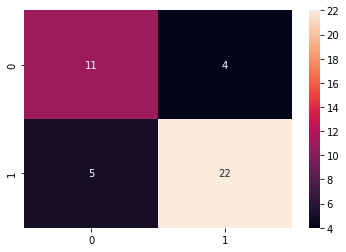

In [25]:
# Logistic Regression
logre = LogisticRegression()
logre.fit(X_train, y_train)
y_train_hat1 = logre.predict(X_train)
y_test_hat1  = logre.predict(X_test)

print(logre)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat1,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat1))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat1)
sns.heatmap(cr,annot=True)

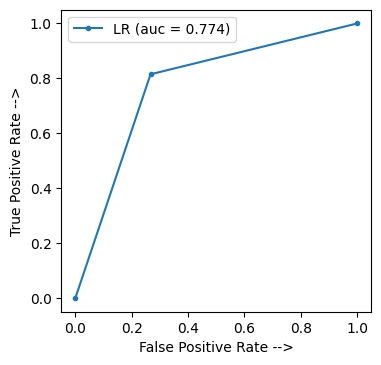

In [26]:
from sklearn.metrics import roc_curve, auc

LR_fpr, LR_tpr, threshold = roc_curve(y_test, y_test_hat1)
auc_LR = auc(LR_fpr, LR_tpr)



plt.figure(figsize=(4,4), dpi=100)

plt.plot(LR_fpr, LR_tpr, marker='.', label='LR (auc = %0.3f)' % auc_LR)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Ok, Logistic Regression worked fine, nothing special, but still 0.62 f1 score on test dataset is pretty well, model also does not overfit. But we want better score, let's try now SVM that should work well on low dimension data

# SVC

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       401
           1       0.68      0.90      0.78       389

    accuracy                           0.74       790
   macro avg       0.77      0.75      0.74       790
weighted avg       0.77      0.74      0.74       790

SVC()
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667        15
           1     0.8148    0.8148    0.8148        27

    accuracy                         0.7619        42
   macro avg     0.7407    0.7407    0.7407        42
weighted avg     0.7619    0.7619    0.7619        42

Roc_auc score
-------------------------------------------------------
0.7407407407407409

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

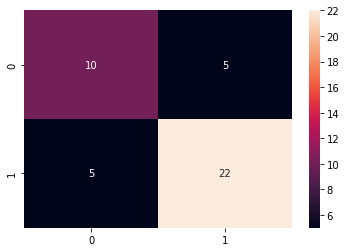

In [27]:
# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat2 = svm.predict(X_train)
y_test_hat2  = svm.predict(X_test)

print(svm)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat2))
print(svm)
#print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat2,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat2))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat2)
sns.heatmap(cr,annot=True)


OK, f1 increased to 0.64, model is not overtrained, even roc_auc is higher so our model is able to do classification better, SVM works fine.... but it's pretty much same as logistic regression, isn't it!? Let's try famous random forest classifier.

# Random Forest

RandomForestClassifier(n_jobs=-1, random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       389

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790

RandomForestClassifier(n_jobs=-1, random_state=123)
-------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9333    0.9655        15
           1     0.9643    1.0000    0.9818        27

    accuracy                         0.9762        42
   macro avg     0.9821    0.9667    0.9737        42
weighted avg     0.9770    0.9762    0.9760        42

Roc_auc score
-------------------------------------------------------
0.9666666666666667

Confusion matrix
-----

<AxesSubplot:>

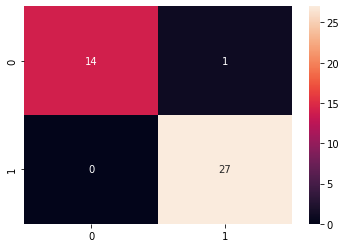

In [28]:
# Random Forest
rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(X_train, y_train)
y_train_hat3 = rfc.predict(X_train)
y_test_hat3 = rfc.predict(X_test)

print(rfc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat3))

print(rfc)
#print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat3,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat3))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat3)
sns.heatmap(cr,annot=True)


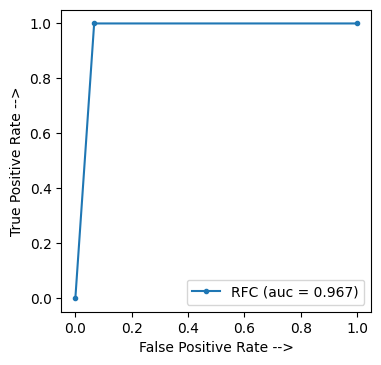

In [29]:
from sklearn.metrics import roc_curve, auc

RFC_fpr, RFC_tpr, threshold = roc_curve(y_test, y_test_hat3)
auc_RFC = auc(RFC_fpr, RFC_tpr)



plt.figure(figsize=(4,4), dpi=100)

plt.plot(RFC_fpr, RFC_tpr, marker='.', label='RFC (auc = %0.3f)' % auc_RFC)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Hell yeah! That's why it's so famous, got 0.84 f1 on test dataset, roc_auc reaching 0.85, all looks great just on fact model is overfitting training data... however, still generalize fine on test data.

# KNN

Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       401
           1       0.77      0.96      0.85       389

    accuracy                           0.83       790
   macro avg       0.85      0.84      0.83       790
weighted avg       0.86      0.83      0.83       790

KNeighborsClassifier()
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8000    0.8000    0.8000        15
           1     0.8889    0.8889    0.8889        27

    accuracy                         0.8571        42
   macro avg     0.8444    0.8444    0.8444        42
weighted avg     0.8571    0.8571    0.8571        42

Roc_auc score
-------------------------------------------------------
0.8444444444444444

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

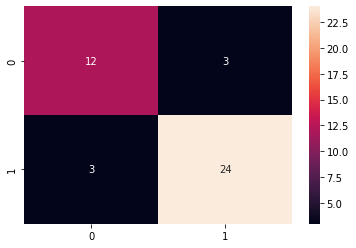

In [30]:
# K-Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_hat4 = knn.predict(X_train)
y_test_hat4  = knn.predict(X_test)

print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat4))
print(knn)
#print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat4,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat4))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat4)
sns.heatmap(cr,annot=True)


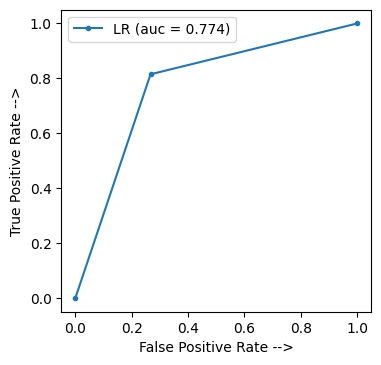

In [31]:
from sklearn.metrics import roc_curve, auc

LR_fpr, LR_tpr, threshold = roc_curve(y_test, y_test_hat1)
auc_LR = auc(LR_fpr, LR_tpr)



plt.figure(figsize=(4,4), dpi=100)

plt.plot(LR_fpr, LR_tpr, marker='.', label='LR (auc = %0.3f)' % auc_LR)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Also not so good

# XGB

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       389

    accuracy                           1.00       790
   macr

<AxesSubplot:>

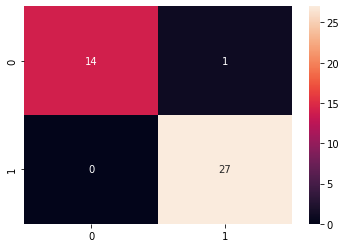

In [32]:
from xgboost import XGBClassifier

xgc = XGBClassifier(random_state=123)
xgc.fit(X_train, y_train)
y_train_hat5 = xgc.predict(X_train)
y_test_hat5  = xgc.predict(X_test)

print(xgc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat5))

print(xgc)
#print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat5,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat5))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat5)
sns.heatmap(cr,annot=True)


Nice one, XGBoost is catching random forest in performance!

# EXTRA TREE

Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       389

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790

ExtraTreesClassifier(random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9333    0.9655        15
           1     0.9643    1.0000    0.9818        27

    accuracy                         0.9762        42
   macro avg     0.9821    0.9667    0.9737        42
weighted avg     0.9770    0.9762    0.9760        42

Roc_auc score
-------------------------------------------------------
0.9666666666666667

Confusion matrix
-----------------------------------------------------

<AxesSubplot:>

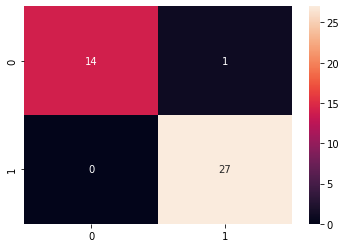

In [33]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=123)
etc.fit(X_train, y_train)
y_train_hat6 = etc.predict(X_train)
y_test_hat6  = etc.predict(X_test)


print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat6))
print(etc)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat6,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat6))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat6)
sns.heatmap(cr,annot=True)


# DTC

DecisionTreeClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       389

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790

DecisionTreeClassifier(random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9333    0.9655        15
           1     0.9643    1.0000    0.9818        27

    accuracy                         0.9762        42
   macro avg     0.9821    0.9667    0.9737        42
weighted avg     0.9770    0.9762    0.9760        42

Roc_auc score
-------------------------------------------------------
0.9666666666666667

Confusion matrix
----------

<AxesSubplot:>

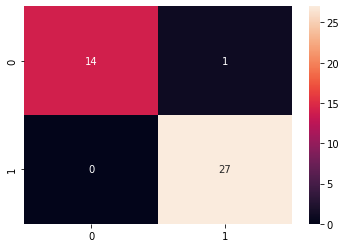

In [34]:
# Random Forest
DTR = DecisionTreeClassifier(random_state=123)
DTR.fit(X_train, y_train)
y_train_hat7 = DTR.predict(X_train)
y_test_hat7 = DTR.predict(X_test)

print(DTR)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat7))
print(DTR)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat7,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat7))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat7)
sns.heatmap(cr,annot=True)

In [54]:
print('VotingClassifier()')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat7,digits=4))


VotingClassifier()
-------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9333    0.9655        15
           1     0.9643    1.0000    0.9818        27

    accuracy                         0.9762        42
   macro avg     0.9821    0.9667    0.9737        42
weighted avg     0.9770    0.9762    0.9760        42



Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       401
           1       0.82      0.97      0.89       389

    accuracy                           0.88       790
   macro avg       0.89      0.88      0.88       790
weighted avg       0.89      0.88      0.88       790

GradientBoostingClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9333    0.9333    0.9333        15
           1     0.9630    0.9630    0.9630        27

    accuracy                         0.9524        42
   macro avg     0.9481    0.9481    0.9481        42
weighted avg     0.9524    0.9524    0.9524        42

Roc_auc score
-------------------------------------------------------
0.9481481481481481

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

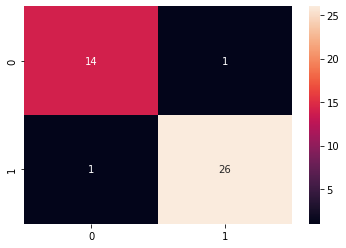

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_train_hat8 = GB.predict(X_train)
y_test_hat8 = GB.predict(X_test)


print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat8))

print(GB)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat8,digits=4))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat8))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_hat8)
sns.heatmap(cr,annot=True)


# Voting

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, accuracy_score

### LR,RFC,GB,ETC,XGB  ==  95.23

In [37]:
# Voting Classifier
voting1 = VotingClassifier(estimators=[
          ('XGB',xgc),
          ('ETC', etc),],
           voting='hard')

In [38]:
# list of classifiers
list_of_classifiers = [xgc,etc,voting1]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
ExtraTreesClassifier 0.9818181818181818
Accuracy:
ExtraTreesClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 0.9818181818181818
Accuracy:
VotingClassifier 0.9761904761904762
----------


### LR,RFC,GB,XGB,DTC   ===   95.23

### LR,RFC,GB,XGB    ===   85.71

In [39]:
# Voting Classifier
voting2 = VotingClassifier(estimators=[
          ('lr', logre),
          ('rf', rfc),
          ('gb', GB),('XGB',xgc),('dtc',DTR) ],
           voting='hard')

In [40]:
# list of classifiers
list_of_classifiers = [logre,rfc,GB,xgc,DTR,voting2]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
LogisticRegression 0.830188679245283
Accuracy:
LogisticRegression 0.7857142857142857
----------
F1 Score:
RandomForestClassifier 0.9818181818181818
Accuracy:
RandomForestClassifier 0.9761904761904762
----------
F1 Score:
GradientBoostingClassifier 0.9629629629629629
Accuracy:
GradientBoostingClassifier 0.9523809523809523
----------
F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
DecisionTreeClassifier 0.9818181818181818
Accuracy:
DecisionTreeClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 0.9818181818181818
Accuracy:
VotingClassifier 0.9761904761904762
----------


### LR,GB,XGB  ==  80.95

In [41]:
# Voting Classifier
voting3 = VotingClassifier(estimators=[
          ('lr', logre),
          ('gb', GB),('XGB',xgc) ],
           voting='hard')

In [42]:
# list of classifiers
list_of_classifiers = [logre,GB,xgc,voting3]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
LogisticRegression 0.830188679245283
Accuracy:
LogisticRegression 0.7857142857142857
----------
F1 Score:
GradientBoostingClassifier 0.9629629629629629
Accuracy:
GradientBoostingClassifier 0.9523809523809523
----------
F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 0.9454545454545454
Accuracy:
VotingClassifier 0.9285714285714286
----------


### XGB,DTR == 97.61

In [43]:
# Voting Classifier
voting4 = VotingClassifier(estimators=[
          ('XGB',xgc),('DTC',DTR) ],
           voting='hard')

In [44]:
# list of classifiers
list_of_classifiers = [xgc,DTR,voting4]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
DecisionTreeClassifier 0.9818181818181818
Accuracy:
DecisionTreeClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 1.0
Accuracy:
VotingClassifier 1.0
----------


### DTR,RFC,GB,ETC,XGB == 95.23

In [45]:
# Voting Classifier
voting5 = VotingClassifier(estimators=[
          ("DTC",DTR),
          ('rf', rfc),
          ('gb', GB),('ETR',etc),('XGB',xgc) ],
           voting='hard')

In [46]:
# list of classifiers
list_of_classifiers = [DTR,rfc,GB,etc,xgc,voting5]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
DecisionTreeClassifier 0.9818181818181818
Accuracy:
DecisionTreeClassifier 0.9761904761904762
----------
F1 Score:
RandomForestClassifier 0.9818181818181818
Accuracy:
RandomForestClassifier 0.9761904761904762
----------
F1 Score:
GradientBoostingClassifier 0.9629629629629629
Accuracy:
GradientBoostingClassifier 0.9523809523809523
----------
F1 Score:
ExtraTreesClassifier 0.9818181818181818
Accuracy:
ExtraTreesClassifier 0.9761904761904762
----------
F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 0.9818181818181818
Accuracy:
VotingClassifier 0.9761904761904762
----------


### DTR,RFC,ETC,XGB  ==  97.61

In [47]:
# Voting Classifier
voting6 = VotingClassifier(estimators=[
          ("DTC",DTR),
          ('rf', rfc),
          ('ETR',etc),('XGB',xgc) ],
           voting='hard')

In [48]:
# list of classifiers
list_of_classifiers = [DTR,rfc,etc,xgc,voting6]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
DecisionTreeClassifier 0.9818181818181818
Accuracy:
DecisionTreeClassifier 0.9761904761904762
----------
F1 Score:
RandomForestClassifier 0.9818181818181818
Accuracy:
RandomForestClassifier 0.9761904761904762
----------
F1 Score:
ExtraTreesClassifier 0.9818181818181818
Accuracy:
ExtraTreesClassifier 0.9761904761904762
----------
F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 0.9818181818181818
Accuracy:
VotingClassifier 0.9761904761904762
----------


### xgc,DTR,etc == 97.61

In [49]:
# Voting Classifier
voting7 = VotingClassifier(estimators=[
          ('XGB',xgc),('DTC',DTR),("ETC",etc) ],
           voting='hard')

In [50]:
# list of classifiers
list_of_classifiers = [xgc,DTR,etc,voting7]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
XGBClassifier 0.9818181818181818
Accuracy:
XGBClassifier 0.9761904761904762
----------
F1 Score:
DecisionTreeClassifier 0.9818181818181818
Accuracy:
DecisionTreeClassifier 0.9761904761904762
----------
F1 Score:
ExtraTreesClassifier 0.9818181818181818
Accuracy:
ExtraTreesClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 0.9818181818181818
Accuracy:
VotingClassifier 0.9761904761904762
----------


In [51]:
# Voting Classifier
voting8 = VotingClassifier(estimators=[
          ('DTC',DTR),('rfc',rfc) ],
           voting='hard')

In [52]:
# list of classifiers
list_of_classifiers = [DTR,rfc,voting8]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
DecisionTreeClassifier 0.9818181818181818
Accuracy:
DecisionTreeClassifier 0.9761904761904762
----------
F1 Score:
RandomForestClassifier 0.9818181818181818
Accuracy:
RandomForestClassifier 0.9761904761904762
----------
F1 Score:
VotingClassifier 1.0
Accuracy:
VotingClassifier 1.0
----------
